## 查找

## 数据准备

In [1]:
!pip install numpy

In [81]:
import numpy as np

np.random.seed(10)
elements = np.random.randint(low=0, high=200000, size=100000).tolist()
print('生成数字的前十个数字：', elements[:10])   

生成数字的前十个数字： [83209, 94735, 181568, 93553, 105595, 9372, 141273, 37597, 17904, 108445]


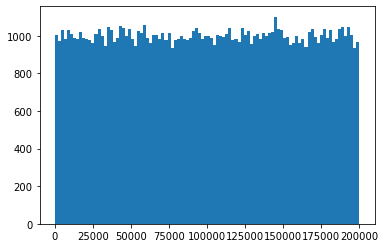

In [82]:
import matplotlib.pyplot as plt

plt.hist(elements, bins=100)
plt.show()

In [69]:
len(list(filter(lambda x: x==0, elements)))

12

### 顺序查找

In [83]:
def search(elements, target):
    """从列表elements中寻找出现target的位置，如果找到，返回下标，如果没有，返回None

    Args:
        elements (list[int]): 待查找元素的查找表
        target (int): 待查找的元素
    """
    for idx, element in enumerate(elements):
        if element == target:
            return idx
        
    return None    
    
    
def search2(elements, target):
    idx = 0
    elements.append(target) # 哨兵
    while elements[idx] != target:
        idx = idx + 1
        
    if idx == len(elements)-1:
        return None
    else:
        return idx
        
print(search(elements, 8))    



None


## 二分查找

In [85]:
def binary_search(elements, target):
    low = 0
    high = len(elements) - 1
    while low<= high:
        mid = (low+high) // 2 
        if elements[mid] == target:
            return mid
        elif elements[mid] > target:
            high = mid - 1
        else:
            low = mid + 1
            
    return None   

Python 3.x中，整除的运算符为“//”，即 5 // 2 = 2,而其他语言中常用的 “/”,Python会将数字转换为浮点数进行运算，因此： 5/2=2.5

In [91]:
print(5 // 2)
print(5 / 2)

2
2.5


比较顺序查找和二分查找的速度差异

In [93]:
import time

# 数据排序后，再来比较时间
elements = np.random.randint(low=0, high=200000, size=100000).tolist()
data = sorted(elements)
target = 100000

start = time.time()
search(data, target)
print(time.time() - start)

start = time.time()
binary_search(data, target)
print(time.time() - start)

0.01499176025390625
0.0


### 二叉查找树
二叉排序树 (Binary Sort Tree) 或者是一棵空树; 或者是具有下列性质的二叉树:

1. 若左子树不空, 则左子树上所有结点的值均小于根结点的值; 若右子树不空, 则右子树上所有结点的值均大于根结点的值。

2. 左右子树也都是二叉排序树。对二叉排序树进行中序遍历, 可以得到一个按关键码有序的序列, 因此, 一个无序序列可通过构造二叉排序树而成为有序序列。

In [15]:
class TreeNode:
    def __init__(self, value, left=None, right=None) -> None:
        self.value = value
        self.left = left
        self.right = right
        
class SearchTree:
    def __init__(self) -> None:
        self.root = None        
    
    
    def search(self, data):
        """从当前节点开始查找data，如果没有找到，则把data插入树中，同时返回false，否则返回true"""
        parent = self.root
        current = self.root
        from_left = False # 是否来自于父节点的左分支
        while current!=None:
            if current.value == data:
                return True
            elif data < current.value:
                parent = current
                current = current.left
                from_left = True
            else:
                parent = current
                current = current.right
                from_left = False
                
        if parent == None:
            self.root = TreeNode(data)
        elif from_left:
            parent.left = TreeNode(data)
        else:
            parent.right = TreeNode(data)
            
        return False
        
        
    def inorder_traverse(self, node:TreeNode):
        path = []
        if node.left != None:
            path.extend(self.inorder_traverse(node.left))
        
        path.append(node.value)
        
        if node.right != None:
            path.extend(self.inorder_traverse(node.right))
            
        return path
        

In [ ]:
tree = SearchTree()

numbers = [63, 90, 70, 55, 67, 42, 98, 83, 10, 45, 58]
for n in numbers: 
    found = tree.search(n)
    print(n, found)

path = tree.inorder_traverse(tree.root)
print(path)

In [25]:
x = [1,3,5]
y = [7,9,10]
#x.append(y)
x.extend(y)
print(x)

[1, 3, 5, 7, 9, 10]


### 哈希表

In [19]:
#name_ages = dict()
name_ages = {}
name_ages['han'] = 18
name_ages['bai'] = 20
name_ages['zhang'] = 18
name_ages['zhao'] = 20
name_ages['liu'] = 18
name_ages['an'] = 20

for key, value in name_ages.items():
    print(key, '=', value)

han = 18
bai = 20
zhang = 18
zhao = 20
liu = 18
an = 20


In [21]:
from collections import OrderedDict

name_ages = OrderedDict()
name_ages['han'] = 18
name_ages['bai'] = 20
name_ages['zhang'] = 18
name_ages['zhao'] = 20
name_ages['liu'] = 18
name_ages['an'] = 20

for key, value in reversed(name_ages.items()):
    print(key, '=', value)

an = 20
liu = 18
zhao = 20
zhang = 18
bai = 20
han = 18
